<a href="https://colab.research.google.com/github/TQT2203/BTVN-AI/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving palm.zip to palm.zip
✅ Giải nén hoàn tất vào thư mục: palm


['rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [4]:
import zipfile
import os

zip_path = "/content/palm.zip"  # hoặc sửa tên file zip nếu khác
extract_path = "/content/palmmm_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén xong!")

✅ Giải nén xong!


In [5]:
data = []
labels = []

classes = ['rock', 'paper', 'scissors']
img_size = (100, 100)

for i, label in enumerate(classes):
    folder_path = f"//content/palmmm_data/{label}"
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0  #độ phân giải
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Lỗi ảnh: {img_path} - {e}")

data = np.array(data)
labels = to_categorical(labels)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [7]:
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,848,579 (14.68 MB)

 Trainable params: 3,848,579 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3948 - loss: 3.6257 - val_accuracy: 0.7374 - val_loss: 0.6871
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7465 - loss: 0.7090 - val_accuracy: 0.7443 - val_loss: 0.5905
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8039 - loss: 0.5441 - val_accuracy: 0.8128 - val_loss: 0.5121
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7856 - loss: 0.6216 - val_accuracy: 0.8037 - val_loss: 0.5099
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8381 - loss: 0.4293 - val_accuracy: 0.7420 - val_loss: 0.6719
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8294 - loss: 0.4597 - val_accuracy: 0.8311 - val_loss: 0.4888
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.8347 - loss: 0.4248 - val_accuracy: 0.7078 - val_loss: 0.6946
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8301 - loss: 0.4774 - val_accuracy: 0.8836 - v

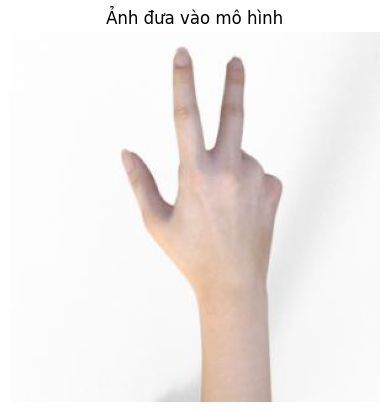

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
✅ Lòng bàn tay dự đoán: **scissors**
🎯 Xác suất: 99.91%


In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Hiển thị ảnh
    img_display = load_img(img_path)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title("Ảnh đưa vào mô hình")
    plt.show()

    # Tiền xử lý ảnh cho mô hình
    img = load_img(img_path, target_size=(100, 100))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán
    pred = model.predict(img)
    class_index = np.argmax(pred)
    confidence = np.max(pred)

    # In kết quả
    print(f"✅ Lòng bàn tay dự đoán: **{classes[class_index]}**")
    print(f"🎯 Xác suất: {confidence * 100:.2f}%")
predict_image("/content/scissors.jpg")
